# Persiapan Dataset

In [2]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# 2. Import library yang dipakai
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# 3. Tentukan folder tempat dataset kamu disimpan
folder_path = "/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data"


In [5]:
# 4. Cari semua file CSV di folder tersebut
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
print("Jumlah file ditemukan:", len(all_files))
print("Contoh file:", all_files[:3])

Jumlah file ditemukan: 12
Contoh file: ['/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data/202007-divvy-tripdata.csv', '/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data/202008-divvy-tripdata.csv', '/content/drive/MyDrive/Google Data Analytics/Portofolio/cyclistic_data/202009-divvy-tripdata.csv']


In [6]:
# 5. Baca semua CSV dan gabung jadi satu dataframe
df_list = []
for file in all_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

print("Total number of rows:", len(df))
print("Number of columns:", len(df.columns))


Total number of rows: 4460151
Number of columns: 13


In [7]:
# 6. Cek struktur data
df.head()      # lihat 5 baris pertama
df.info()      # info kolom & tipe data
df.isna().sum() # cek jumlah missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460151 entries, 0 to 4460150
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 442.4+ MB


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,282068
start_station_id,282694
end_station_name,315109
end_station_id,315570
start_lat,0
start_lng,0


# Data Cleaning

In [8]:
# 1. Bikin Kolom "ride_length"
# Pastikan kolom datetime dibaca sebagai datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Buat kolom durasi (dalam menit)
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [9]:
# 2. Bikin Kolom "day_of_week"
# Day of week (Senin = 0, Minggu = 6)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Kalau mau nama hari
df['day_name'] = df['started_at'].dt.day_name()


In [10]:
# 1. Bikin Kolom "ride_length" dan "day_of_week"
# Pastikan kolom datetime dibaca sebagai datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Buat kolom durasi (dalam menit)
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Day of week (Senin = 0, Minggu = 6)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Kalau mau nama hari
df['day_name'] = df['started_at'].dt.day_name()

# 3. Bersihin Data Aneh
# Cek distribusi ride_length
print("Min ride_length:", df['ride_length'].min())
print("Max ride_length:", df['ride_length'].max())

# Filter data bersih
df_clean = df[(df['ride_length'] > 1) & (df['ride_length'] < 1440)].copy()
print("Jumlah baris setelah cleaning:", len(df_clean))

Min ride_length: -29049.966666666667
Max ride_length: 55944.15
Jumlah baris setelah cleaning: 4378504


In [11]:
# 4. Cek Ulang Data Bersih
df_clean.info()
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 4378504 entries, 0 to 4460150
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_of_week         int32         
 15  day_name            object        
dtypes: datetime64[ns](2), float64(5), int32(1), object(8)
memory usage: 551.2+ MB


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,4378504,4378504,4.378504e+06,4.378504e+06,4.374678e+06,4.374678e+06,4.378504e+06,4.378504e+06
mean,2020-12-25 09:23:19.299150080,2020-12-25 09:46:23.842462208,4.190313e+01,-8.764438e+01,4.190343e+01,-8.764464e+01,2.307572e+01,3.218737e+00
min,2020-07-01 00:00:14,2020-07-01 00:06:53,4.164000e+01,-8.787000e+01,4.151000e+01,-8.807000e+01,1.016667e+00,0.000000e+00
25%,2020-08-29 14:19:16,2020-08-29 14:49:04,4.188213e+01,-8.765862e+01,4.188224e+01,-8.765879e+01,7.783333e+00,1.000000e+00
50%,2020-11-11 18:02:02,2020-11-11 18:15:20,4.189960e+01,-8.764083e+01,4.190000e+01,-8.764109e+01,1.390000e+01,3.000000e+00
75%,2021-05-12 06:01:19.750000128,2021-05-12 06:17:58.750000128,4.192955e+01,-8.762694e+01,4.192955e+01,-8.762761e+01,2.540000e+01,5.000000e+00
max,2021-06-30 23:59:59,2021-07-01 19:42:18,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,1.439900e+03,6.000000e+00
std,NaN,NaN,4.386334e-02,2.591775e-02,4.397236e-02,2.608149e-02,4.276275e+01,1.993289e+00


# Masuk Analisis Eksplorasi (EDA)


In [ ]:
# 1. Statistik Dasar (Casual vs Member)
# Statistik dasar per kelompok user
df_clean.groupby('member_casual')['ride_length'].describe()


,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,1897105.0,33.583531,58.338394,1.016667,10.883333,19.516667,36.616667,1439.900000
member,2481399.0,15.042182,21.812457,1.016667,6.400000,10.983333,18.966667,1439.716667


In [ ]:
# 2. Rata-rata Durasi Perjalanan
df_clean.groupby('member_casual')['ride_length'].mean()


,ride_length
member_casual,
casual,33.583531
member,15.042182


In [ ]:
# 3. Jumlah Ride per Hari
df_clean.groupby(['member_casual', 'day_name']).size().reset_index(name='ride_count')


,member_casual,day_name,ride_count
0,casual,Friday,276361
1,casual,Monday,205681
2,casual,Saturday,432949
3,casual,Sunday,360839
4,casual,Thursday,208901
5,casual,Tuesday,200541
6,casual,Wednesday,211833
7,member,Friday,367677
8,member,Monday,331279
9,member,Saturday,368673


In [ ]:
# 4. Pemakaian Berdasarkan Jenis Sepeda
df_clean.groupby(['member_casual','rideable_type']).size().reset_index(name='ride_count')


,member_casual,rideable_type,ride_count
0,casual,classic_bike,447895
1,casual,docked_bike,957767
2,casual,electric_bike,491443
3,member,classic_bike,812714
4,member,docked_bike,1054495
5,member,electric_bike,614190


In [ ]:
# 5. Tren Bulanan
df_clean['month'] = df_clean['started_at'].dt.to_period('M')
df_clean.groupby(['month','member_casual']).size().reset_index(name='ride_count')


,month,member_casual,ride_count
0,2020-07,casual,266002
1,2020-07,member,276572
2,2020-08,casual,283890
3,2020-08,member,324980
4,2020-09,casual,226529
5,2020-09,member,295418
6,2020-10,casual,141748
7,2020-10,member,237917
8,2020-11,casual,86628
9,2020-11,member,168387


# Visualisasi

/tmp/ipython-input-1283017084.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='member_casual', y='ride_length', estimator='mean', ci=None)


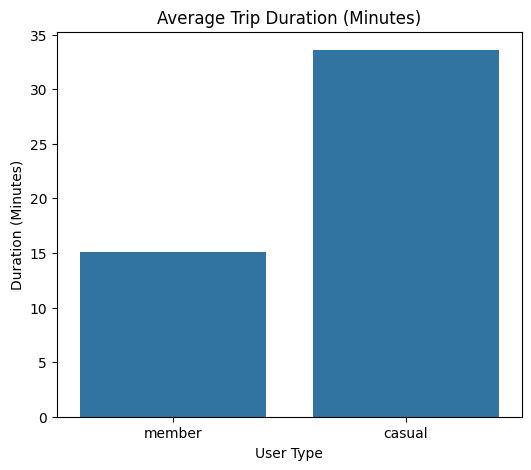

In [ ]:
# 1. Rata-rata Durasi Perjalanan (Casual vs Member)
plt.figure(figsize=(6,5))
sns.barplot(data=df_clean, x='member_casual', y='ride_length', estimator='mean', ci=None)
plt.title("Average Trip Duration (Minutes)")
plt.ylabel("Duration (Minutes)")
plt.xlabel("User Type")
plt.show()


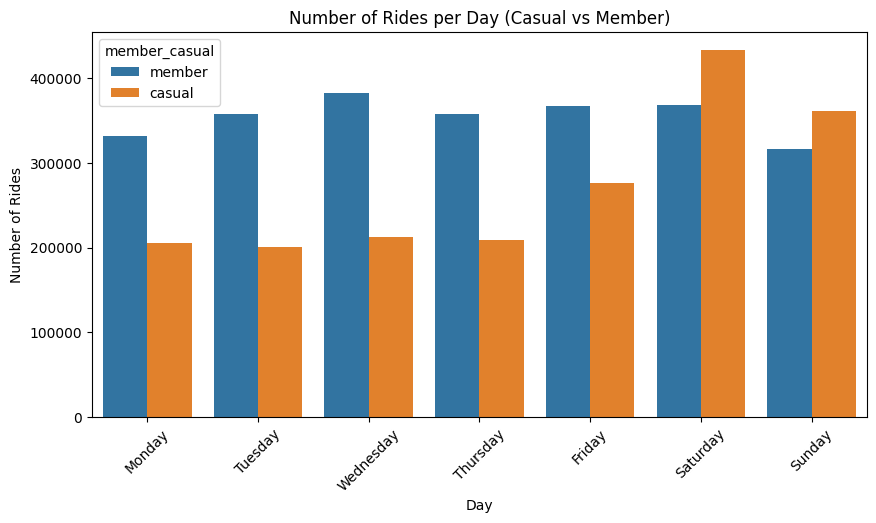

In [ ]:
# 2. Jumlah Ride per Hari (Weekday vs Weekend)
plt.figure(figsize=(10,5))
sns.countplot(data=df_clean, x='day_name', hue='member_casual',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Number of Rides per Day (Casual vs Member)")
plt.ylabel("Number of Rides")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.show()


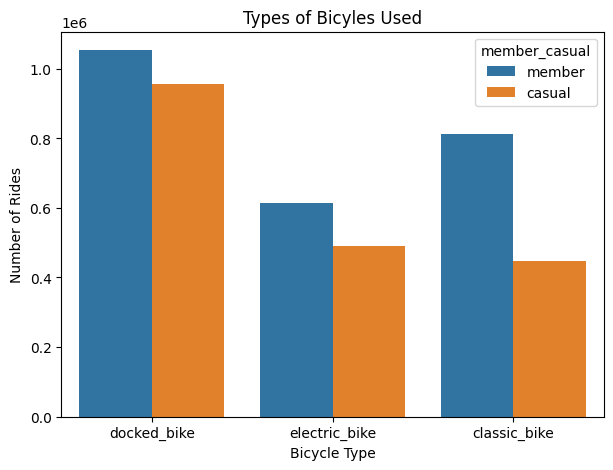

In [ ]:
# 3. Pemakaian Berdasarkan Jenis Sepeda
plt.figure(figsize=(7,5))
sns.countplot(data=df_clean, x='rideable_type', hue='member_casual')
plt.title("Types of Bicyles Used")
plt.ylabel("Number of Rides")
plt.xlabel("Bicycle Type")
plt.show()


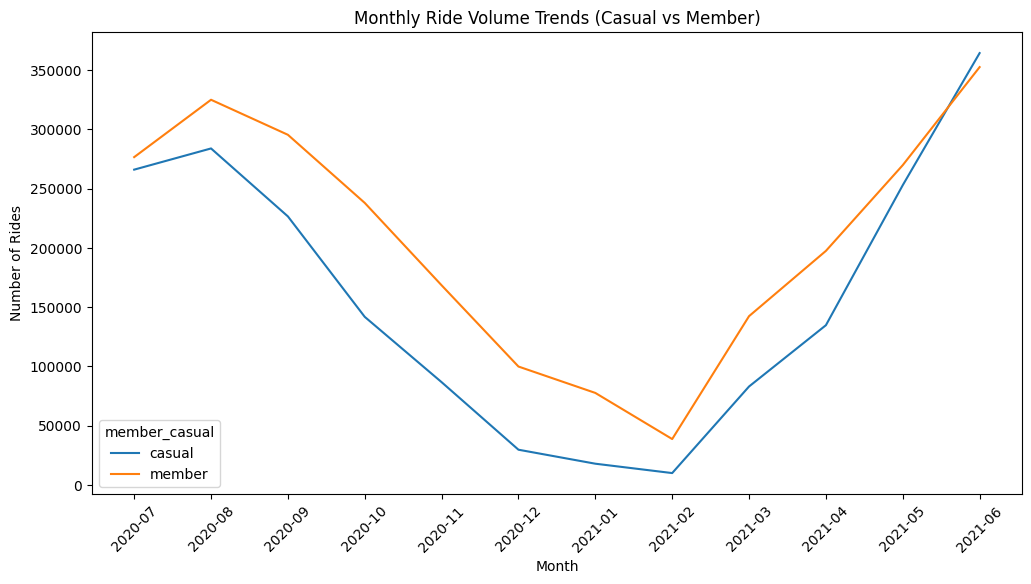

In [ ]:
# 4. Tren Bulanan (Casual vs Member)
df_clean['month'] = df_clean['started_at'].dt.to_period('M').astype(str)

# Group by month and member_casual and count the rides
monthly_rides = df_clean.groupby(['month','member_casual']).size().reset_index(name='ride_count')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_rides, x='month', y='ride_count', hue='member_casual')
plt.title("Monthly Ride Volume Trends (Casual vs Member)")
plt.ylabel("Number of Rides")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# ANALISIS LANJUTAN

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [13]:
# 1. Analisis Spasial sederhana — Top start / end stations + map-like scatter

# Top start stations (overall and by member_casual)
top_start_overall = df_clean['start_station_name'].value_counts().head(20).reset_index()
top_start_overall.columns = ['start_station_name', 'ride_count']
top_start_overall

# By member_casual (top 10 each)
top_start_by_type = (df_clean.groupby(['member_casual','start_station_name'])
                           .size().reset_index(name='ride_count'))
top_start_by_type = top_start_by_type.sort_values(['member_casual','ride_count'], ascending=[True, False])
top_start_by_type.groupby('member_casual').head(10)


,member_casual,start_station_name,ride_count
612,casual,Streeter Dr & Grand Ave,44455
371,casual,Lake Shore Dr & Monroe St,31574
454,casual,Millennium Park,27721
448,casual,Michigan Ave & Oak St,21927
615,casual,Theater on the Lake,20764
372,casual,Lake Shore Dr & North Blvd,20714
325,casual,Indiana Ave & Roosevelt Rd,16759
546,casual,Shedd Aquarium,16710
446,casual,Michigan Ave & Lake St,14948
139,casual,Clark St & Elm St,14302


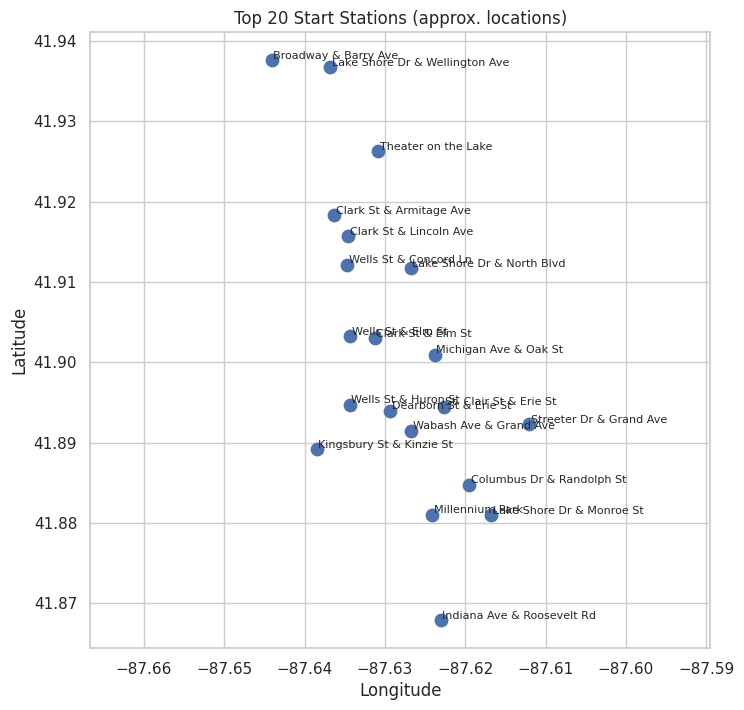

In [14]:
# Get lat/lng for top start stations
top20 = top_start_overall['start_station_name'].tolist()
stations_top20 = df_clean[df_clean['start_station_name'].isin(top20)][['start_station_name','start_lat','start_lng']].drop_duplicates('start_station_name')

plt.figure(figsize=(8,8))
plt.scatter(stations_top20['start_lng'], stations_top20['start_lat'], s=80)
for i,row in stations_top20.iterrows():
    plt.text(row['start_lng']+0.0002, row['start_lat']+0.0002, row['start_station_name'], fontsize=8)
plt.title('Top 20 Start Stations (approx. locations)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


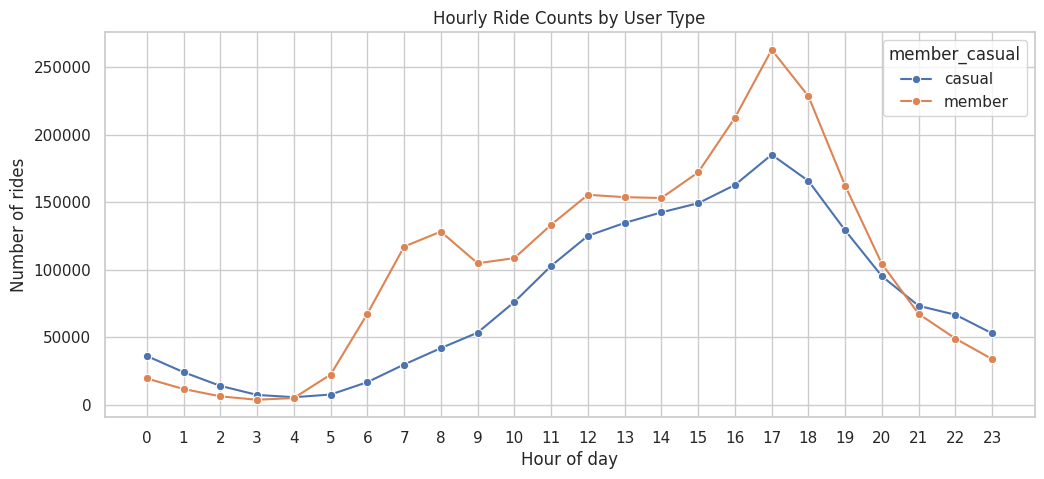

In [16]:
# 2. Hourly trends — jam pemakaian (expect commuting peaks)

# extract hour
df_clean['hour'] = df_clean['started_at'].dt.hour

# aggregate counts by hour and user type
hourly = df_clean.groupby(['hour','member_casual']).size().reset_index(name='ride_count')

plt.figure(figsize=(12,5))
sns.lineplot(data=hourly, x='hour', y='ride_count', hue='member_casual', marker='o')
plt.title('Hourly Ride Counts by User Type')
plt.xlabel('Hour of day')
plt.ylabel('Number of rides')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


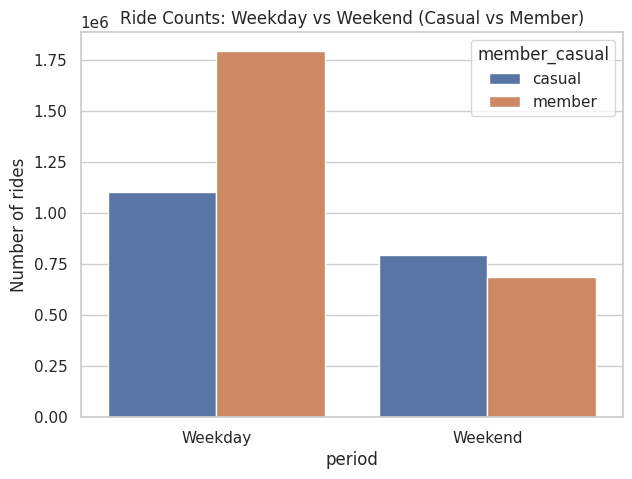

In [17]:
# 3. Weekday vs Weekend — perbandingan detail

# is_weekend flag
df_clean['is_weekend'] = df_clean['day_name'].isin(['Saturday','Sunday'])

# counts per weekday/weekend by user type
counts_wd = df_clean.groupby(['is_weekend','member_casual']).size().reset_index(name='ride_count')
counts_wd['period'] = counts_wd['is_weekend'].map({False:'Weekday', True:'Weekend'})

plt.figure(figsize=(7,5))
sns.barplot(data=counts_wd, x='period', y='ride_count', hue='member_casual')
plt.title('Ride Counts: Weekday vs Weekend (Casual vs Member)')
plt.ylabel('Number of rides')
plt.show()


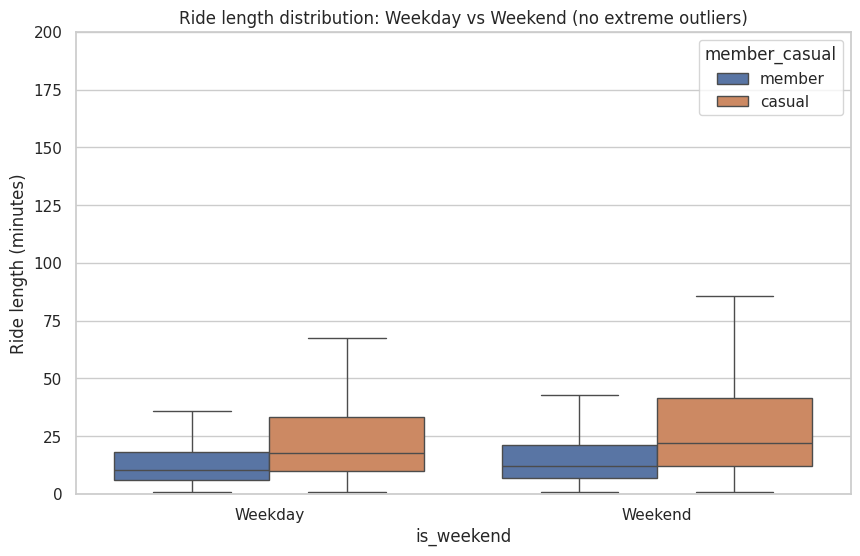

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='is_weekend', y='ride_length', hue='member_casual',
            showfliers=False)  # hide extreme outliers for readability
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.ylabel('Ride length (minutes)')
plt.title('Ride length distribution: Weekday vs Weekend (no extreme outliers)')
plt.ylim(0, 200)  # focus on reasonable range
plt.show()


In [19]:
# 4. Ride length distribution — histogram & summary, detect outliers

# Summary stats
ride_stats = df_clean.groupby('member_casual')['ride_length'].agg(['count','mean','median','std','min','max','quantile'])
# quantile not convenient this way; do separately
q = df_clean.groupby('member_casual')['ride_length'].quantile([0.25,0.75]).unstack(level=1)
ride_summary = df_clean.groupby('member_casual')['ride_length'].agg(['count','mean','median','std','min','max']).join(q)
ride_summary.columns = ['count','mean','median','std','min','max','q25','q75']
ride_summary


,count,mean,median,std,min,max,q25,q75
member_casual,,,,,,,,
casual,1897105,33.583531,19.516667,58.338394,1.016667,1439.900000,10.883333,36.616667
member,2481399,15.042182,10.983333,21.812457,1.016667,1439.716667,6.400000,18.966667


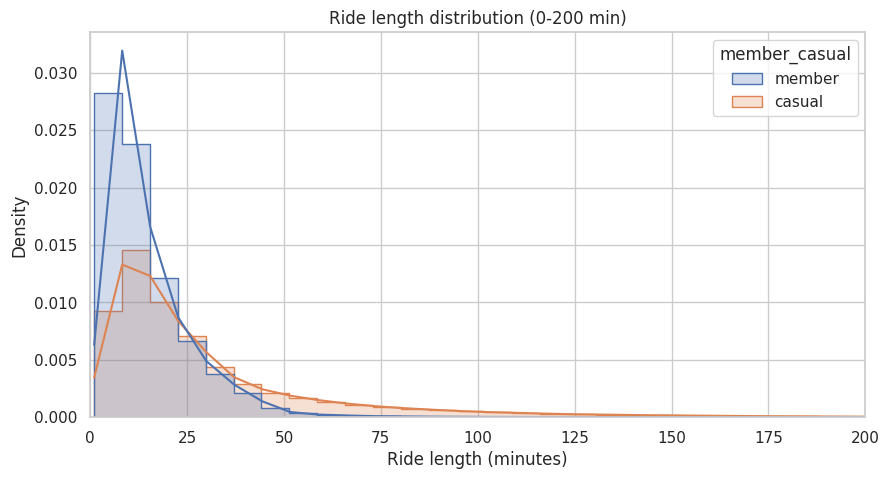

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x='ride_length', hue='member_casual', bins=200, kde=True, element='step', stat='density')
plt.xlim(0,200)  # focus view
plt.title('Ride length distribution (0-200 min)')
plt.xlabel('Ride length (minutes)')
plt.show()


In [21]:
# 5. Cohort-ish / Retention alternative — month-to-month activity & "relative persistence"

# month column (string)
df_clean['month_str'] = df_clean['started_at'].dt.to_period('M').astype(str)

monthly = df_clean.groupby(['month_str','member_casual']).size().reset_index(name='ride_count')
monthly_pivot = monthly.pivot(index='month_str', columns='member_casual', values='ride_count').fillna(0)
monthly_pivot['total'] = monthly_pivot.sum(axis=1)
monthly_pivot


member_casual,casual,member,total
month_str,,,
2020-07,266002,276572,542574
2020-08,283890,324980,608870
2020-09,226529,295418,521947
2020-10,141748,237917,379665
2020-11,86628,168387,255015
2020-12,29620,99815,129435
2021-01,17813,77549,95362
2021-02,9904,38618,48522
2021-03,82987,142344,225331


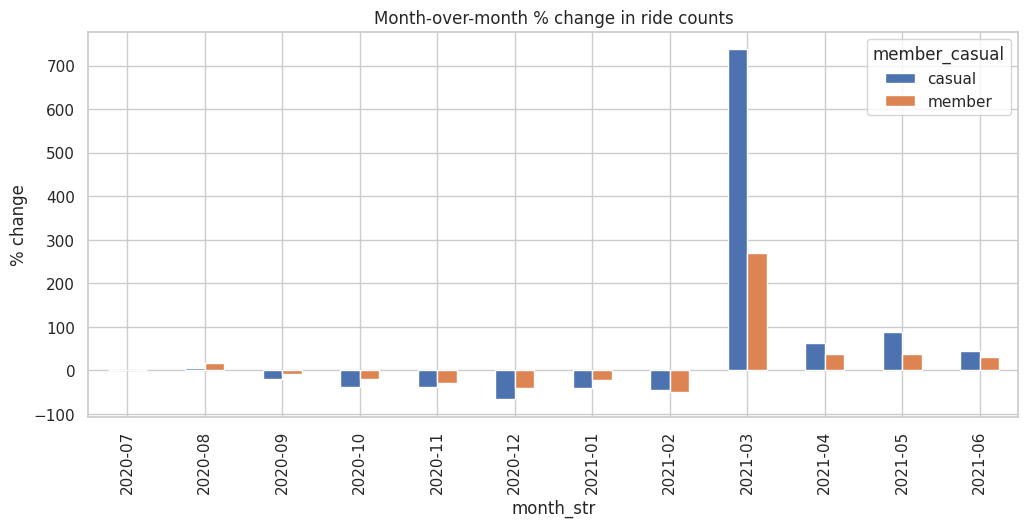

In [22]:
monthly_pct = monthly_pivot.pct_change().fillna(0) * 100
monthly_pct[['casual','member']].plot(kind='bar', figsize=(12,5))
plt.title('Month-over-month % change in ride counts')
plt.ylabel('% change')
plt.show()


In [23]:
# 6. Revenue Estimation / Scenario Analysis (asumsi sederhana)

# Parameters (ubah sesuai asumsi)
single_ride_price = 3.0        # $ per single ride (casual)
day_pass_price   = 8.0         # $ per day pass (if used)
annual_price     = 99.0        # $ per annual membership

# Data we have: counts of casual rides and member rides
total_casual_rides = len(df_clean[df_clean['member_casual']=='casual'])
total_member_rides = len(df_clean[df_clean['member_casual']=='member'])

total_casual_rides, total_member_rides


(1897105, 2481399)

In [24]:
# Helper function to estimate scenarios
def revenue_scenario(p_convert=0.1, avg_rides_per_member_per_year=50):
    """p_convert: fraction of casual *riders* we convert (0-1).
       avg_rides_per_member_per_year: assumed average rides per new member per year."""
    # estimate number of converted riders (we don't have unique users -> approximate using rides)
    # Approach: assume average rides per casual-user ~ R_c (unknown). We cannot compute R_c without user_id.
    # So we approximate by treating conversions in terms of rides: convert p fraction of casual rides into members.
    casual_rides = total_casual_rides
    rides_converted = int(casual_rides * p_convert)  # assumption: p fraction of rides converted
    revenue_before = casual_rides * single_ride_price + (0) # ignore members' prior revenue (they paid membership)
    # New revenue: remaining casual single-ride revenue + membership fees of new members
    # Need to approximate number of new members = rides_converted / avg_rides_per_member_per_year
    new_members = rides_converted / avg_rides_per_member_per_year
    revenue_after = (casual_rides - rides_converted) * single_ride_price + new_members * annual_price
    return {
        'p_convert': p_convert,
        'rides_converted': rides_converted,
        'est_new_members': new_members,
        'revenue_before': revenue_before,
        'revenue_after': revenue_after,
        'revenue_change': revenue_after - revenue_before
    }

# Example: convert 5%, 10%, 20%
for p in [0.05, 0.1, 0.2]:
    print(revenue_scenario(p, avg_rides_per_member_per_year=50))


{'p_convert': 0.05, 'rides_converted': 94855, 'est_new_members': 1897.1, 'revenue_before': 5691315.0, 'revenue_after': 5594562.9, 'revenue_change': -96752.09999999963}
{'p_convert': 0.1, 'rides_converted': 189710, 'est_new_members': 3794.2, 'revenue_before': 5691315.0, 'revenue_after': 5497810.8, 'revenue_change': -193504.2000000002}
{'p_convert': 0.2, 'rides_converted': 379421, 'est_new_members': 7588.42, 'revenue_before': 5691315.0, 'revenue_after': 5304305.58, 'revenue_change': -387009.4199999999}


In [26]:
# 7. Station flow / OD matrix (start → end)

# Build OD counts (top 20 flows)
od = df_clean.groupby(['start_station_name','end_station_name']).size().reset_index(name='ride_count')
od_top = od.sort_values('ride_count', ascending=False).head(20)
od_top


,start_station_name,end_station_name,ride_count
127882,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,9892
74449,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,8897
94150,Millennium Park,Millennium Park,6653
12882,Buckingham Fountain,Buckingham Fountain,5864
92067,Michigan Ave & Oak St,Michigan Ave & Oak St,5759
65797,Indiana Ave & Roosevelt Rd,Indiana Ave & Roosevelt Rd,4837
54824,Fort Dearborn Dr & 31st St,Fort Dearborn Dr & 31st St,4597
128589,Theater on the Lake,Theater on the Lake,4476
90235,Michigan Ave & 8th St,Michigan Ave & 8th St,3969
74895,Lake Shore Dr & North Blvd,Lake Shore Dr & North Blvd,3939


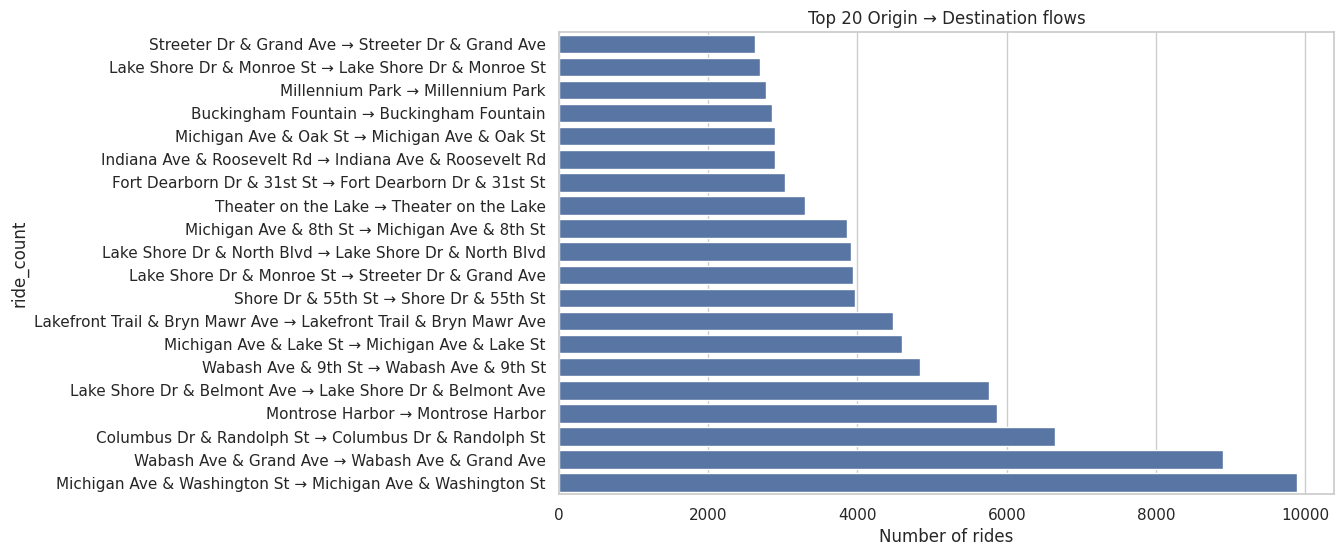

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=od_top, y='ride_count', x='ride_count', orient='h')
plt.yticks(range(len(od_top)), od_top['start_station_name'] + " → " + od_top['end_station_name'])
plt.title('Top 20 Origin → Destination flows')
plt.xlabel('Number of rides')
plt.show()


In [29]:
# 8. Save summary outputs / tables (untuk README & slides)

top_start_overall.to_csv('top_start_overall.csv', index=False)
top_start_by_type.groupby('member_casual').head(10).to_csv('top_start_by_type_top10.csv', index=False)
monthly_pivot.to_csv('monthly_counts_by_type.csv')
od_top.to_csv('top_od_flows.csv', index=False)
